In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifierCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('filled_df_encoded.csv')
df.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3,1,3,0,2,1,0,2,8,2,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1,0,3,1,2,1,1,0,1,0,0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,1.0,1.0,4.0,1.0,2.0,0,2,3,1,0,1,0,0,9,0,2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,5.0,5.0,4.0,1.0,4,0,3,0,2,1,1,2,5,1,0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,2.0,3.0,1.0,4.0,2,4,3,0,0,0,0,0,9,0,1.0,0.0,0,0


<Axes: >

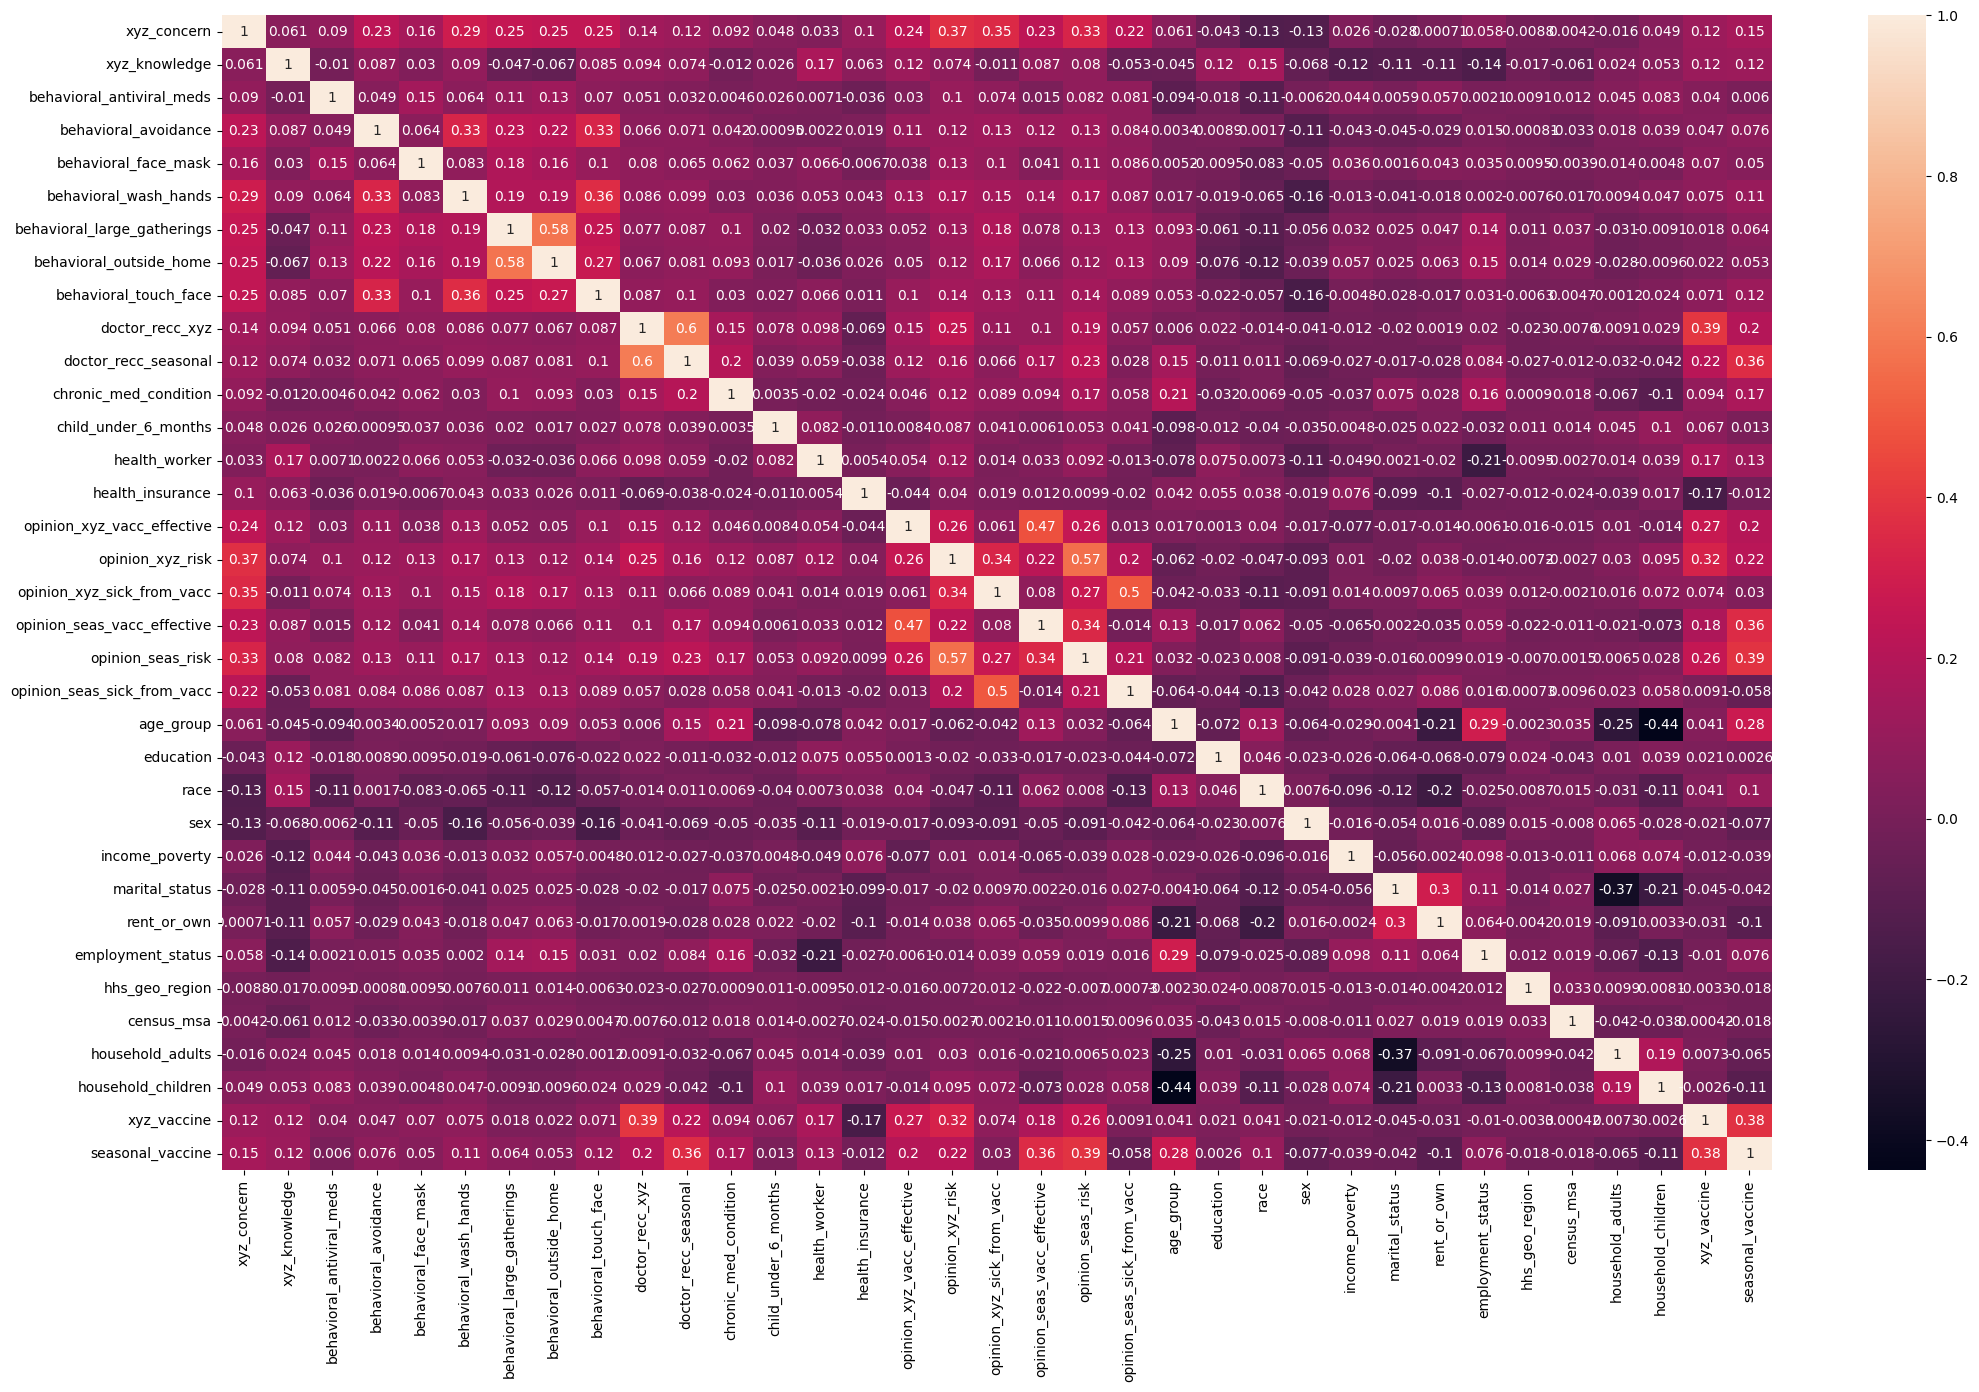

In [3]:
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(),annot=True)

In [4]:
# prompt: input = df.drop(["xyz_vaccine","seasonal_vaccine"], axis=1)
# target = df["xyz_vaccine","seasonal_vaccine"]

input = df.drop(["xyz_vaccine", "seasonal_vaccine"], axis=1)
target = df[["xyz_vaccine", "seasonal_vaccine"]]


In [5]:
input.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3,1,3,0,2,1,0,2,8,2,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1,0,3,1,2,1,1,0,1,0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,1.0,1.0,4.0,1.0,2.0,0,2,3,1,0,1,0,0,9,0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,5.0,5.0,4.0,1.0,4,0,3,0,2,1,1,2,5,1,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,3.0,2.0,3.0,1.0,4.0,2,4,3,0,0,0,0,0,9,0,1.0,0.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=42)

In [7]:
from sklearn.multioutput import MultiOutputClassifier
classifier = MultiOutputClassifier(RandomForestClassifier())
classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier())

In [8]:
classifier.score(X_test, y_test)

0.6845750655185324

In [9]:
# prompt: calculate roc auc score

from sklearn.metrics import roc_auc_score

y_pred = classifier.predict(X_test)
roc_auc_score(y_test, y_pred)


0.7425020617822515

In [11]:
classifier = MultiOutputClassifier(LogisticRegression())
classifier.fit(X_train, y_train)
print(classifier.score(X_test, y_test))
y_pred = classifier.predict(X_test)
print(roc_auc_score(y_test, y_pred))

0.6776488206664171
0.7387721391852011


In [12]:
classifier = MultiOutputClassifier(GradientBoostingClassifier())
classifier.fit(X_train, y_train)
print(classifier.score(X_test, y_test))
y_pred = classifier.predict(X_test)
print(roc_auc_score(y_test, y_pred))

0.6941220516660427
0.7528693492364029


In [13]:
classifier = MultiOutputClassifier(DecisionTreeClassifier())
classifier.fit(X_train, y_train)
print(classifier.score(X_test, y_test))
y_pred = classifier.predict(X_test)
print(roc_auc_score(y_test, y_pred))

0.5396855110445526
0.6763040747150993


In [14]:
classifier = MultiOutputClassifier(KNeighborsClassifier())
classifier.fit(X_train, y_train)
print(classifier.score(X_test, y_test))
y_pred = classifier.predict(X_test)
print(roc_auc_score(y_test, y_pred))

0.5949082740546612
0.6764859493819004


In [15]:
from xgboost import XGBClassifier
classifier = MultiOutputClassifier(XGBClassifier())
classifier.fit(X_train, y_train)
print(classifier.score(X_test, y_test))
y_pred = classifier.predict(X_test)
print(roc_auc_score(y_test, y_pred))

0.6795207787345563
0.7498468583989591


In [16]:
classifier = MultiOutputClassifier(AdaBoostClassifier())
classifier.fit(X_train, y_train)
print(classifier.score(X_test, y_test))
y_pred = classifier.predict(X_test)
print(roc_auc_score(y_test, y_pred))

0.6870086110071134
0.7494522235764767


In [17]:
classifier = MultiOutputClassifier(GaussianNB())
classifier.fit(X_train, y_train)
print(classifier.score(X_test, y_test))
y_pred = classifier.predict(X_test)
print(roc_auc_score(y_test, y_pred))

0.6181205540995882
0.7353624238507636


In [18]:
testing_df = pd.read_csv("testing_encoded.csv")

In [20]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   26708 non-null  int64  
 1   xyz_concern                  26708 non-null  float64
 2   xyz_knowledge                26708 non-null  float64
 3   behavioral_antiviral_meds    26708 non-null  float64
 4   behavioral_avoidance         26708 non-null  float64
 5   behavioral_face_mask         26708 non-null  float64
 6   behavioral_wash_hands        26708 non-null  float64
 7   behavioral_large_gatherings  26708 non-null  float64
 8   behavioral_outside_home      26708 non-null  float64
 9   behavioral_touch_face        26708 non-null  float64
 10  doctor_recc_xyz              26708 non-null  float64
 11  doctor_recc_seasonal         26708 non-null  float64
 12  chronic_med_condition        26708 non-null  float64
 13  child_under_6_mo

In [22]:
testing_df.drop("Unnamed: 0",axis=1,inplace=True)

In [24]:
testing_df.shape

(26708, 33)

In [25]:
input.shape

(26707, 33)

In [26]:
classifier = MultiOutputClassifier(GradientBoostingClassifier())
classifier.fit(input, target)


MultiOutputClassifier(estimator=GradientBoostingClassifier())

In [44]:
y_pred_prob = classifier.predict_proba(testing_df)

# Extract probabilities for each class
xyz_prob = y_pred_prob[0][:, 1]  # Probabilities for xyz_vaccine
seasonal_prob = y_pred_prob[1][:, 1]  # Probabilities for seasonal_vaccine



In [52]:
id = pd.read_csv("test_set_features.csv")
id = id.respondent_id
id=pd.DataFrame(id)

In [53]:
id

,respondent_id
0,26707
1,26708
2,26709
3,26710
4,26711
...,...
26703,53410
26704,53411
26705,53412
26706,53413


In [54]:
# prompt: add xyz_prob and seasonal_prob in id as new col

id["xyz_prob"] = xyz_prob
id["seasonal_prob"] = seasonal_prob


In [55]:
id

,respondent_id,xyz_prob,seasonal_prob
0,26707,0.135177,0.194336
1,26708,0.039613,0.037785
2,26709,0.145943,0.721169
3,26710,0.604854,0.870586
4,26711,0.295917,0.502773
...,...,...,...
26703,53410,0.330907,0.575078
26704,53411,0.152106,0.370160
26705,53412,0.154472,0.265006
26706,53413,0.026980,0.339153


In [58]:
# prompt: rename id col as respondent_id,xyz_vaccine,seasonal_vaccine

id.rename(columns={"id": "respondent_id", "xyz_prob": "xyz_vaccine", "seasonal_prob": "seasonal_vaccine"}, inplace=True)


In [59]:
id


,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.135177,0.194336
1,26708,0.039613,0.037785
2,26709,0.145943,0.721169
3,26710,0.604854,0.870586
4,26711,0.295917,0.502773
...,...,...,...
26703,53410,0.330907,0.575078
26704,53411,0.152106,0.370160
26705,53412,0.154472,0.265006
26706,53413,0.026980,0.339153


In [60]:
# prompt: save id.csv without index

id.to_csv('submission.csv', index=False)
